# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [8]:
import random #importing random library

In [9]:
def simulate_dice_rolls(n):
    dice = [random.choice(range(1, 7)) for _ in range(n)]
    return dice

In [11]:
# similutatin 10 rolls 
dice_rolls = simulate_dice_rolls(11)
dice = pd.DataFrame({'Rolls': dice_rolls})
print(dice)

    Rolls
0       6
1       1
2       2
3       5
4       2
5       5
6       4
7       4
8       5
9       6
10      1


#### 2.- Plot the results sorted by value.

In [12]:
import plotly.express as px
px.histogram(dice.Rolls, nbins=10)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [13]:
frequency_distribution = dice['Rolls'].value_counts().reset_index()
frequency_distribution.columns = ['Rolls', 'Frequency']
print(frequency_distribution)

   Rolls  Frequency
0      5          3
1      6          2
2      1          2
3      2          2
4      4          2


In [14]:
px.histogram(frequency_distribution, x='Frequency', nbins=100)
                     
             

In [15]:
px.histogram(frequency_distribution, x='Frequency', y='Rolls', nbins=10, orientation='v')

In [16]:
px.histogram(frequency_distribution, x='Frequency', y='Rolls', nbins=10, orientation='h')

In [ ]:
# First histogram shows how many times each value was dropped. 3 rd histogram shoes only 3 values in versical side and if I display it in horizontal side it displays all 4 values.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [17]:
# converting rolls column values to integers.
dice['Rolls'] = dice['Rolls'].astype(int)


In [18]:
dice_mean = sum(dice['Rolls']) / len(dice['Rolls']) 
dice_mean

3.727272727272727

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [19]:
# frequency distribution
frequency_distribution = dice['Rolls'].value_counts().reset_index()
frequency_distribution.columns = ['Rolls', 'Frequency']
print(frequency_distribution)

   Rolls  Frequency
0      5          3
1      6          2
2      1          2
3      2          2
4      4          2


In [20]:
sum = (frequency_distribution['Rolls'] * frequency_distribution['Frequency']).sum()
total_frequency = frequency_distribution['Frequency'].sum()
mean = sum / total_frequency
print(mean)

3.727272727272727


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [21]:
rolls_values = dice['Rolls']
rolls_values

0     6
1     1
2     2
3     5
4     2
5     5
6     4
7     4
8     5
9     6
10    1
Name: Rolls, dtype: int32

In [22]:
# sorting by values
sorted_rolls = sorted(rolls_values)
sorted_rolls

[1, 1, 2, 2, 4, 4, 5, 5, 5, 6, 6]

In [23]:
n = len(sorted_rolls)
median = sorted_rolls[n // 2]
median

4

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [24]:
# Quartile 25%
q1 = (sorted_rolls[n // 4] + sorted_rolls[n // 4 - 1]) / 2
print(q1)
# Quartile 50%
q2 = median
print(q2)
# Quartile 75%
q3 = (sorted_rolls[3 * n // 4] + sorted_rolls[3 * n // 4 - 1]) / 2
print(q3)

1.5
4
5.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [25]:
file_path = 'roll_the_dice_hundred.csv'
rolls_hundred = pd.read_csv(file_path)
rolls_hundred.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [26]:
rolls_values = dice['Rolls']
rolls_values

0     6
1     1
2     2
3     5
4     2
5     5
6     4
7     4
8     5
9     6
10    1
Name: Rolls, dtype: int32

In [27]:
# sorting the values 
rolls__hundred_values = rolls_hundred['value']
sorted_rolls_hundred = sorted(rolls__hundred_values)
sorted_rolls_hundred


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [28]:
px.histogram(sorted_rolls_hundred, nbins=10)

In [ ]:
The distribution on histogram is negative skewed. Kurtosis - it has Platycurtic curve.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [29]:
import numpy as np

In [30]:
# converting rolls column values to integers.
rolls_hundred['value'] = rolls_hundred['value'].astype(int)

In [60]:
dice_hundred_mean = sum(rolls_hundred['value']) / len(rolls_hundred['value']) 
dice_hundred_mean



TypeError: 'numpy.int64' object is not callable

In [ ]:
# using function but i get very strange error "'numpy.int64' object is not callable" while i know that all values are numeric in "value", so i used build in function instead.

In [43]:
mean = np.mean(rolls_hundred['value'])
mean

3.74

#### 3.- Now, calculate the frequency distribution.


In [66]:
frequency_distribution = rolls_hundred['value'].value_counts().reset_index()
frequency_distribution.columns = ['value', 'Frequency']
print(frequency_distribution)

   value  Frequency
0      6         23
1      4         22
2      2         17
3      3         14
4      1         12
5      5         12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

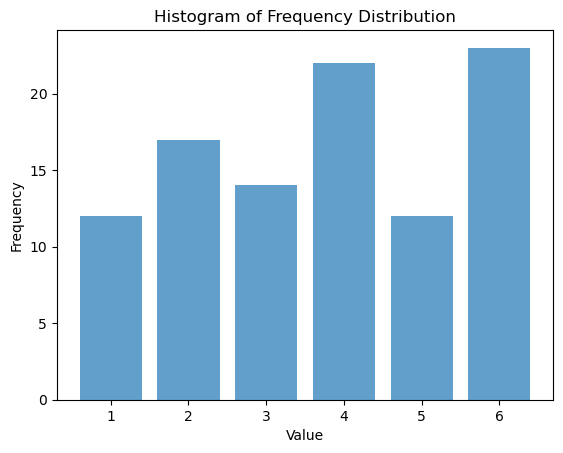

In [67]:
plt.bar(frequency_distribution['value'], frequency_distribution['Frequency'], align='center', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency Distribution')
plt.xticks(frequency_distribution['value'])
plt.show()

In [54]:
frequency_distribution.shape

(5, 2)

In [ ]:
# The histagram is positively skewed. Mean is alsmot in the center of the peak. There is 4 and 6 were rolled more times there other values.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [69]:
file_path = 'roll_the_dice_thousand.csv'
thousand = pd.read_csv(file_path)
thousand.head(10)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
5,5,5,2
6,6,6,6
7,7,7,5
8,8,8,6
9,9,9,6


In [70]:
frequency_distribution2 = thousand['value'].value_counts().reset_index()
frequency_distribution2.columns = ['value', 'Frequency']
print(frequency_distribution2)

   value  Frequency
0      1        175
1      3        175
2      4        168
3      2        167
4      6        166
5      5        149


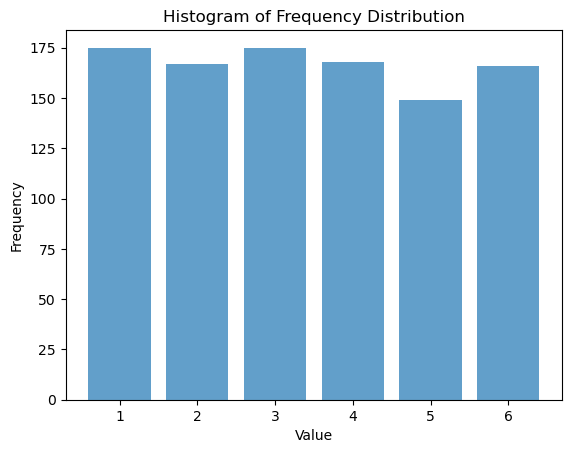

In [71]:
plt.bar(frequency_distribution2['value'], frequency_distribution2['Frequency'], align='center', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency Distribution')
plt.xticks(frequency_distribution2['value'])
plt.show()

In [ ]:
# Yes, it changed a lot. The roll's values are more equal now. I think It is like this because we have more tries and information (like in statistics)

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [72]:
file_path = 'ages_population.csv'
ages = pd.read_csv(file_path)
ages.head(10)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
5,27.0
6,39.0
7,12.0
8,42.0
9,33.0


In [76]:
age_frequency_distribution = ages['observation'].value_counts().reset_index()
age_frequency_distribution.columns = ['observation', 'Frequency']
print(age_frequency_distribution)

    observation  Frequency
0          39.0         45
1          41.0         36
2          30.0         34
3          35.0         33
4          43.0         32
..          ...        ...
67         73.0          1
68         82.0          1
69         70.0          1
70         71.0          1
71         69.0          1

[72 rows x 2 columns]


KeyError: 'observation'

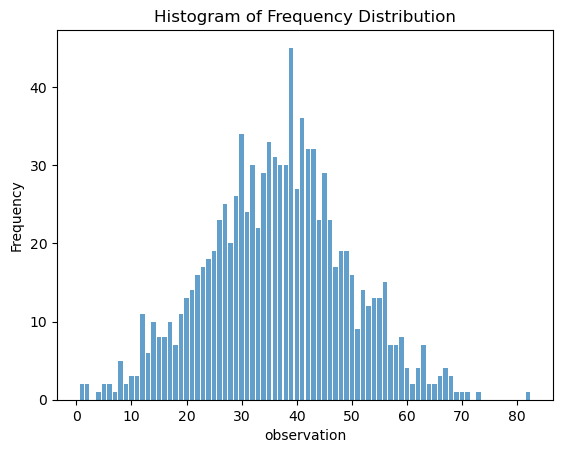

In [89]:
plt.bar(age_frequency_distribution['observation'], age_frequency_distribution['Frequency'], align='center', alpha=0.7)
plt.xlabel('observation')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency Distribution')
plt.xticks(frequency_distribution['observation'])
plt.show()
# i got error but after checking i see everything is correct and histagram was still plotted.

In [ ]:
# I think mean is around 39 years old 

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [80]:
mean = ages['observation'].mean()
mean

36.56

In [86]:
std = ages['observation'].std()
std

12.816499625976762

In [ ]:
# Prediction of mean age through histagram was almost correct.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [87]:
file_path = 'ages_population2.csv'
ages2 = pd.read_csv(file_path)
ages2.head(10)

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
5,29.0
6,28.0
7,30.0
8,24.0
9,26.0


In [88]:
age2_frequency_distribution = ages2['observation'].value_counts().reset_index()
age2_frequency_distribution.columns = ['observation', 'Frequency']
print(age2_frequency_distribution)

    observation  Frequency
0          28.0        139
1          27.0        125
2          26.0        120
3          29.0        115
4          25.0         98
5          30.0         90
6          24.0         78
7          31.0         61
8          23.0         41
9          22.0         35
10         32.0         31
11         33.0         22
12         21.0         17
13         20.0         13
14         34.0          7
15         19.0          3
16         35.0          3
17         36.0          2


KeyError: 'observation'

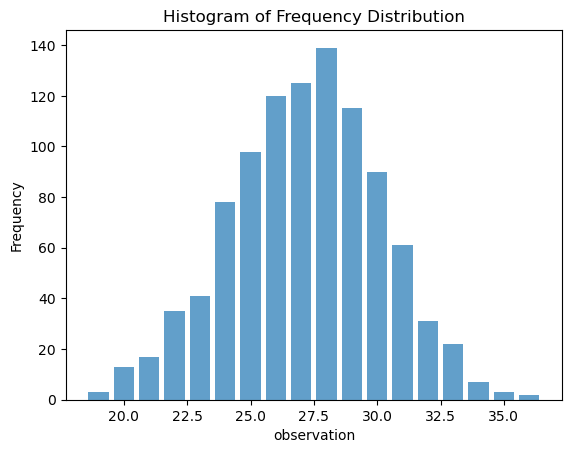

In [91]:
plt.bar(age2_frequency_distribution['observation'], age2_frequency_distribution['Frequency'], align='center', alpha=0.7)
plt.xlabel('observation')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency Distribution')
plt.xticks(frequency_distribution['observation'])
plt.show()


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
# The age group here is differet. Most people are in their 20's or 30's. It has almost normal disturbution.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [92]:
mean = ages2['observation'].mean()
mean

27.155

In [93]:
std = ages2['observation'].std()
std

2.969813932689186

In [ ]:
It is also very easy predict mean just looking at histagram values.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [94]:
file_path = 'ages_population3.csv'
ages3 = pd.read_csv(file_path)
ages3.head(10)

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
5,52.0
6,37.0
7,69.0
8,36.0
9,30.0


In [95]:
age3_frequency_distribution = ages3['observation'].value_counts().reset_index()
age3_frequency_distribution.columns = ['observation', 'Frequency']
print(age3_frequency_distribution)

    observation  Frequency
0          32.0         37
1          35.0         31
2          37.0         31
3          39.0         29
4          36.0         26
..          ...        ...
70         76.0          1
71          8.0          1
72          9.0          1
73          1.0          1
74          7.0          1

[75 rows x 2 columns]


KeyError: 'observation'

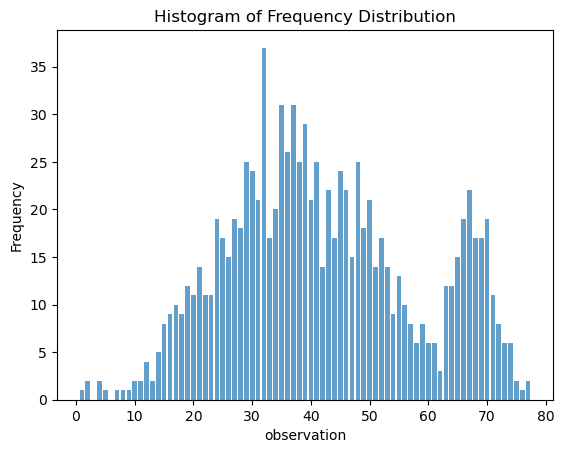

In [96]:
plt.bar(age3_frequency_distribution['observation'], age3_frequency_distribution['Frequency'], align='center', alpha=0.7)
plt.xlabel('observation')
plt.ylabel('Frequency')
plt.title('Histogram of Frequency Distribution')
plt.xticks(frequency_distribution['observation'])
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [99]:
mean = ages3['observation'].mean()
mean

41.989

In [100]:
std = ages3['observation'].std()
std

16.144705959865934

In [ ]:
# Mean and standard deviations are different for histagram step 1 and step 2. I guess this is because just wider age group was taken to create this data frame.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [102]:
first_quartile = ages3['observation'].quantile(0.25)
second_quartile = ages3['observation'].quantile(0.5) 
third_quartile = ages3['observation'].quantile(0.75)
maximum = ages3['observation'].quantile(1.0)


In [103]:
print("First Quartile (Q1):", first_quartile)
print("Second Quartile (Median, Q2):", second_quartile)
print("Third Quartile (Q3):", third_quartile)
print("Maximum (Q4):", maximum)

First Quartile (Q1): 30.0
Second Quartile (Median, Q2): 40.0
Third Quartile (Q3): 53.0
Maximum (Q4): 77.0


In [ ]:
# Median is very close to mean  result. With std result I cab say this data is more spread out the for histagrame in step 1.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [105]:
percentile_10 = ages3['observation'].quantile(0.1)
percentile_90 = ages3['observation'].quantile(0.9)

In [106]:
print("10 Percentile:", percentile_10)
print("90 Percentile:", percentile_90)

10 Percentile: 22.0
90 Percentile: 67.0


In [ ]:
# Looking at 10% of data we can say there are not many babies more young people in early 20's and at 90% I can tell there are a bit older people (but not too old)

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""